<a href="https://colab.research.google.com/github/polytron1/MY-Portofolio/blob/main/Classification/Penguin%20Classification/Penguin%20Dataset%20EDA%20Classification%20and%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Module 2: Data Preprocessing**

##**Importing Libraries**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install pandas_profiling
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=e854e20781659e4a4720345411ebe775bf646e0c0d7533

<ipython-input-1-44f7874eef9e>:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Importing Dataset**

Download Dataset pada: https://bit.ly/DatasetExerciseDSSC4

Run code di bawah untuk upload file, lalu choose file penguins_lter.csv dan penguins_size.csv

In [ ]:
#import dataset
from google.colab import files
uploaded = files.upload()

Saving penguins_lter.csv to penguins_lter.csv
Saving penguins_size.csv to penguins_size.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['penguins_size.csv']))
study_data = pd.read_csv(io.BytesIO(uploaded['penguins_lter.csv']))

Memanggil tabel data

In [ ]:
#Menampilkan data
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


##**Describing Dataset**

Tampilkan statistik deskriptif dari data!

In [ ]:
#Menampilkan data deskripsi
data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


***
**Insight**
***
Berapa rata - rata body mass penguin? \
Jawab: 4201.754386 g

##**Handling Missing Values**

Cek jumlah missing value!

In [ ]:
#cek missing value
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Drop missing value pada culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g!

In [ ]:
#Menghilangkan missing value
data.drop(data[data['body_mass_g'].isnull()].index,axis=0, inplace=True)

Mengisi missing value pada sex dengan modus!

In [ ]:
#Mengisi missing value pada kolom sex dengan modus
data['sex'] = data['sex'].fillna('MALE')

Pada baris ke 336 kolom sex, terdapat data berisi titik (.), drop baris data tersebut!

In [ ]:
#menghilangkan data berisi (.)
data.drop(data[data['sex']=='.'].index, inplace=True)

Cek kembali apakah masih ada missing value!

In [ ]:
#Cek missing value
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

***
**Insight**
***
Apakah masih terdapat missing value?\
Sudah tidak ada missing value

##**Exploratory Data Analysis**

Tampilkan grafik yang menunjukkan jumlah tiap spesies pinguin!

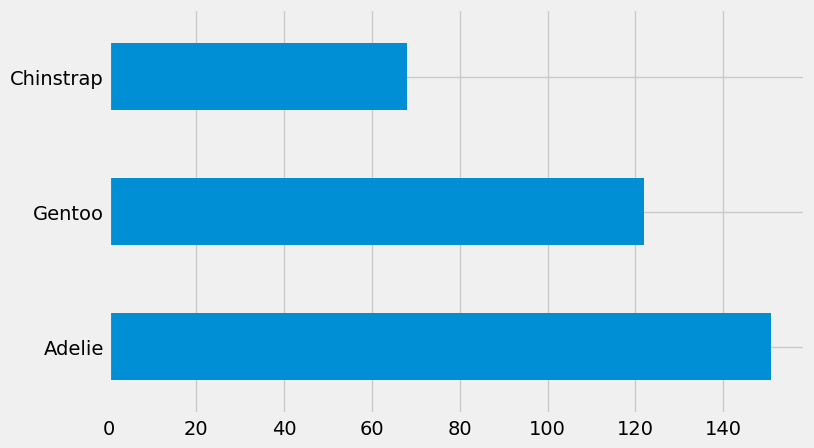

In [ ]:
#Menampilkan grafik jumlah tiap spesies pinguin
data['species'].value_counts().plot(kind='barh')
plt.show()

***
**Insight**
***
Spesies apa dengan jumlah pinguin paling banyak?\
Jumlah terbanyak terdapat pada pinguin jenis **Adelie**

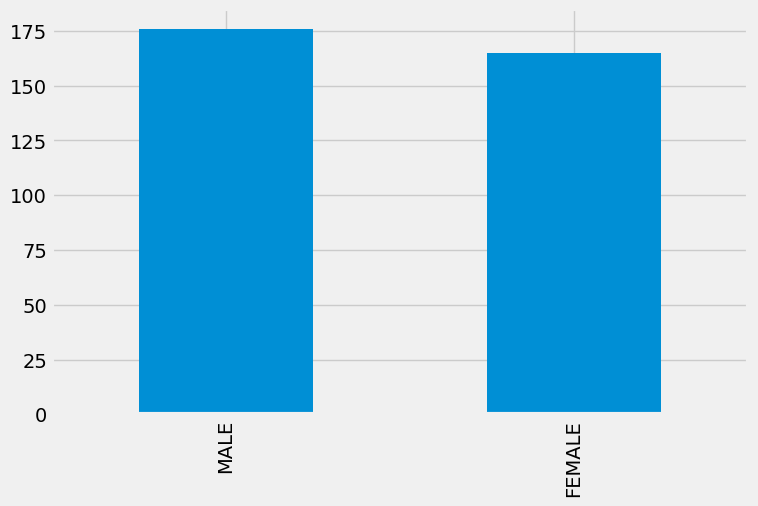

In [ ]:
#Menampilkan grafik jumlah tiap spesies pinguin
data['sex'].value_counts().plot(kind='bar')
plt.show()

Jumlah pinguin: 341

MALE = 176

FEMALE = 165

Tampilkan scatterplot yang menunjukkan korelasi antara culmen_length dan flipper_length!

culmen_length vs flipper_length


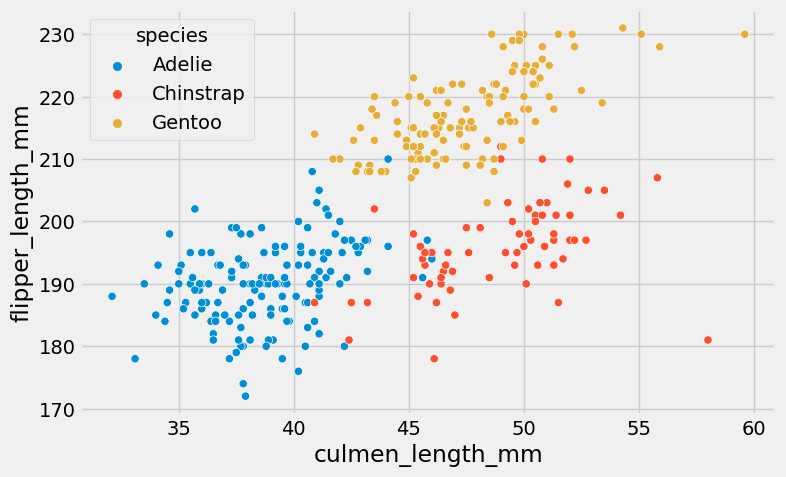

In [ ]:
#Menampilkan scatterplot antara culmen_length_mm dan flipper_length_mm
print('culmen_length vs flipper_length')
sns.scatterplot(data=data, x='culmen_length_mm', y='flipper_length_mm', hue='species')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara culmen_length dan flipper_length?\
Jawab:
- Dari scatterplot di atas diketahui bahwa korelasi antara culmen_length_mm dengan flipper_length_mm adalah berbanding lurus (berkorelasi positif), atau semakin besar culmen_length_mm maka flipper_length_mm juga semakin besar.
- Jika dilihat dari correlation matrix korelasi anntara culmen_length dan flipper_length_mm memiliki korelasi sebesar 0,66. Korelasinya adalah strong correlation dan memiliki korelasi positif.
- Maka, kita bisa melihat salah satu dari variabel tersebut untuk memperkirakan ukuran flipper atau culmen dari pinguin

Tampilkan scatterplot yang menunjukkan korelasi antara flipper_length dan body_mass!

flipper_length vs body_mass


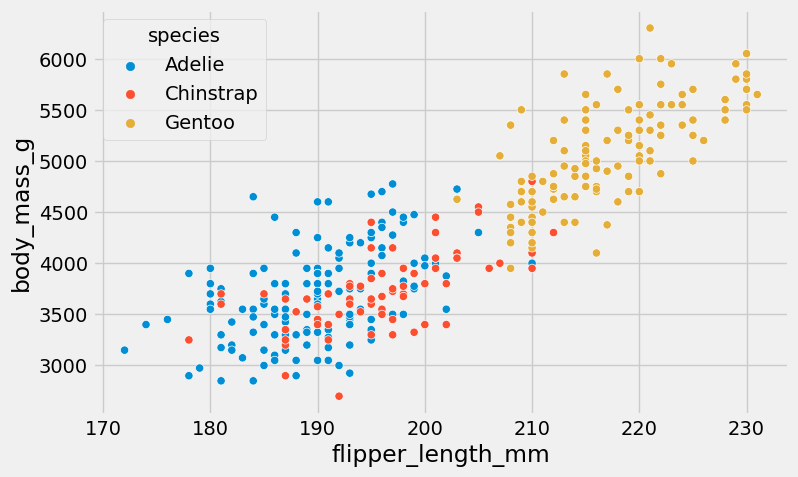

In [ ]:
##Menampilkan scatterplot antara culmen_length_mm dan body_mass_g
print('flipper_length vs body_mass')
sns.scatterplot(data=data, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara flipper_length dan body_mass?\
Jawab:
- Dari scatterplot di atas diketahui bahwa korelasi antara flipper_length_mm terhadap bidy_mass_g adalah berbanding lurus (berkolerasi positif), atau semakin besar_length_mm maka semakin besar pula body_mass_g.
- Jika dilihat dari correlation matrix korelasi anntara flipper_length dan body_mass_g memiliki korelasi sebesar 0,87. Korelasinya adalah very strong correlation dan memiliki korelasi positif.
- Untuk memperkirakan ukuran dari pinguin tidak cukup menggunakan 1 variabel saja, karena terdapat kemiripan antara pinguin jenis Adelie dan Chinstrap

<ipython-input-15-6158dd4beb0d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



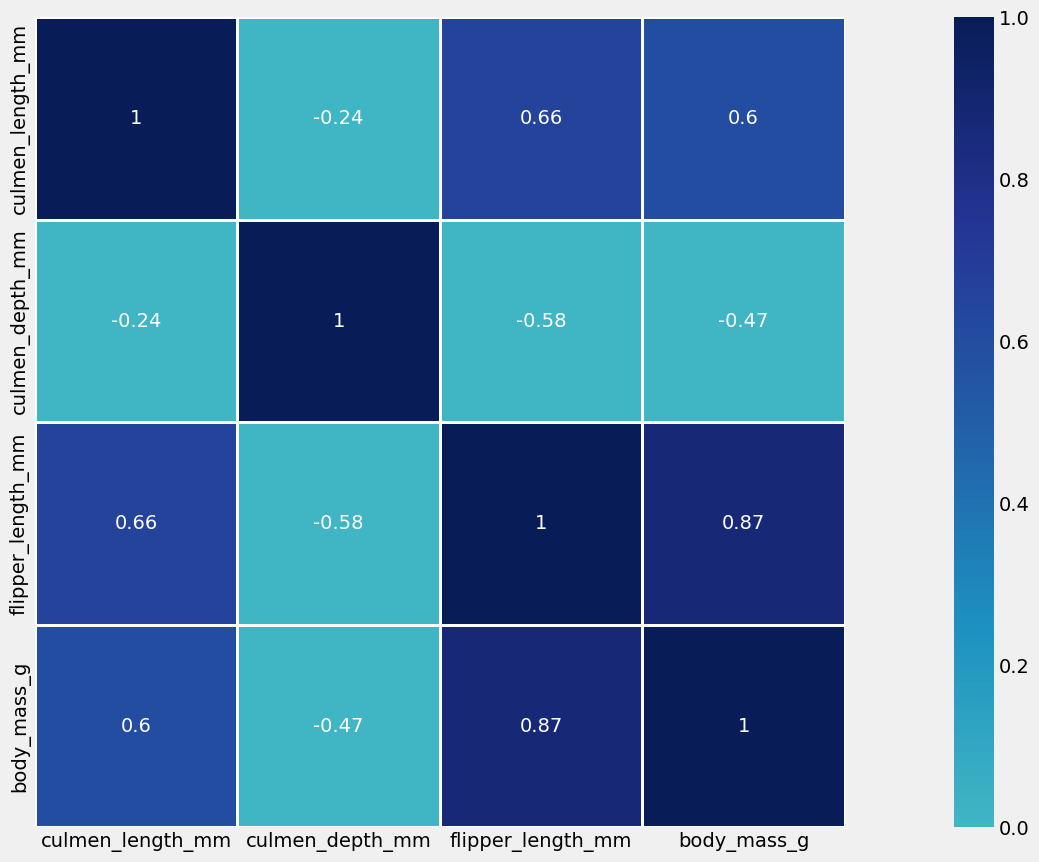

In [ ]:
#berikut penjelasan dari korelasinya
corrMatrix = data.corr()
plt.figure(figsize=(25,10)) # Plotting the figure of required size
ax = sns.heatmap(corrMatrix, vmin=0, vmax=1, center=0, annot=True,
                 cmap="YlGnBu", linewidths = 1.0,
                 square=True)

plt.show()

Tampilkan pairplot dari semua variabel!

Pairplot


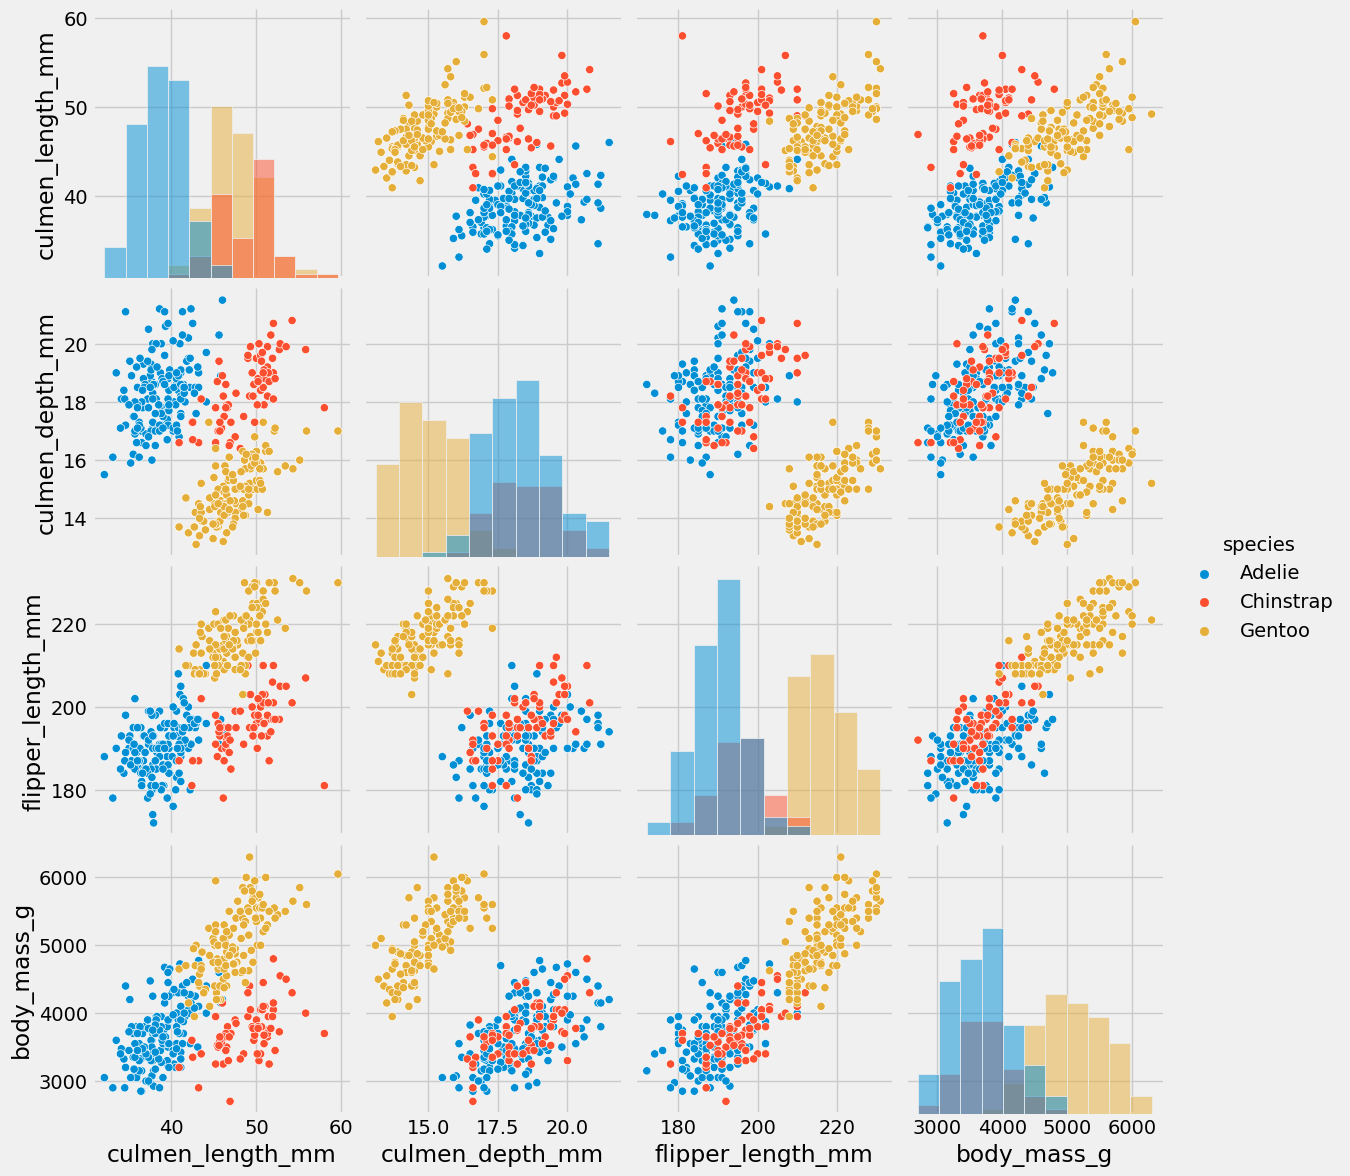

In [ ]:
#Menampilkan pairplot
print('Pairplot')
sns.pairplot(data=data[['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g']], hue="species", height=3, diag_kind="hist")
plt.show()

***
**Insight**
***
Apa kesimpulan yang dapat kamu ambil dari pairplot di atas?\

Jawab: Jika dikelompokkan terdapat 2 kategori korelasi yaitu positif dan negatif.
Korelasi positif terdapat pada:
- culmen_length terhadap body_mass
- culmen_length terhadap flipper_length
- flipper_length terhadap body_mass
- flipper_length terhadap culmen_length
- body_mass terhadap flipper_length
- body_mass terhadap culmen_length

Korelasi negatif terdapat pada:
- culmen_length terhadap culmen_depth
- culmen_depth terhadap body_mass
- culmen_depth terhadap flipper_length
- culmen_depth terhadap culmen_length
- flipper_length terhadap culmen_depth
- body_mass terhadap culmen_depth

selain itu, untuk spesies Gentoo memiliki ukuran yang lebih besar dari spesies lain.

#**Module 3: Machine Learning**

##**Data Encoding**

Lakukan data encoding pada kolom 'species' dan 'island'!

In [ ]:
#encoding pada variabel species dan island
df = data.copy()
encode = ['species','island']

for col in encode:
    dummy = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df,dummy], axis=1)
    del df[col]

Data encoding untuk kolom 'sex', kodekan male sebagai 0 dan female sebagai 1!

In [ ]:
#encoding pada variabel sex
target_mapper = {'MALE':0, 'FEMALE':1}
def target_encode(val):
    return target_mapper[val]

df['sex'] = df['sex'].apply(target_encode)

In [ ]:
#menampilkan data hasil encoding
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,1,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,1,0,0,0,0,1
5,39.3,20.6,190.0,3650.0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,0,1,1,0,0
340,46.8,14.3,215.0,4850.0,1,0,0,1,1,0,0
341,50.4,15.7,222.0,5750.0,0,0,0,1,1,0,0
342,45.2,14.8,212.0,5200.0,1,0,0,1,1,0,0


***
**Insight**
***
Bagaimana dataset setelah dilakukan encoding?\
Jawaban:
- Setelah dilakukan encoding pada kolom species dan island maka terdapat kolom baru untuk masing-masing row unik pada kolom species dan island. Untuk kolom species digantikan menjadi 3 kolom yaitu species_Adelie, species_Chinstrap, dan species_Gentoo. Sedangkan untuk kolom island digantkan menjadi 3 kolom yaitu island_Biscoe, island_Dream, dan island_Torgersen.
- Pada kolom sex sebelumnya didefiniskan oleh 'MALE' atau 'FEMALE', setelah dilakukan encoding kolom sex didefinisika oleh '0':'MALE' dan '1':'FEMALE'.

##**Memisahkan Variabel Dependen dan Independen**

Variabel dependen yang digunakan adalah data pada kolom 'sex', kolom lainnya merupakan variabel independen

Pisahkan variabel independen sebagai X dan independen sebagai y!

In [ ]:
#Memisahkan variabel independen(x) dan dependen(y)
X = df.drop('sex', axis=1)
y = df['sex']

##**Scaling the Data**

Lakukan scaling pada x!

In [ ]:
from sklearn import preprocessing

In [ ]:
#Melakukan scalling data
X = preprocessing.scale(X)

##**Spltting Dataset**

Pisahkan dataset menjadi training dan testing dataset dengan perbandingan 80:20!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Melakukan splitting data dengan traing 80 dan testing 20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=45)

##**Model Fitting**

Build model klasifikasi machine learning menggunakan model Decision Tree!

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Melakukan model Fitting
model = DecisionTreeClassifier().fit(X_train, y_train)
pred = model.predict(X_test)

#**Module 4: Model Performance Analytics**

##**Classification Report**

Tampilkan hasil evaluasi model yang telah dibangun menggunakan classification report!

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
#Menampilkan classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        41
           1       0.78      0.89      0.83        28

    accuracy                           0.86        69
   macro avg       0.85      0.86      0.85        69
weighted avg       0.86      0.86      0.86        69



***
**Insight**
***
Bagaimana interpretasi hasil classification report model kalian?\
Jawab: Karena data dependen (y) yang digunakan adalah variabel sex yang jika dilihat termasuk pada kategori data balance (seimbang), maka kita lebih mementingkan akurasi dari model yang telah dibuat dalam hal ini decision tree. Pada hasil classification report ini dihasilkan nilai akurasi sebesar 0,86 atau 86%, dimana hasil tersebut tergolong baik. Sehingga model yang dibuat dalam hal ini decision tree baik dalam membedakan pinguin dengan sex MALE atau FEMALE.

##**Confusion Matrix**

Tampilkan hasil evaluasi model yang telah dibangun menggunakan confusion matrix!

[[34  7]
 [ 3 25]]


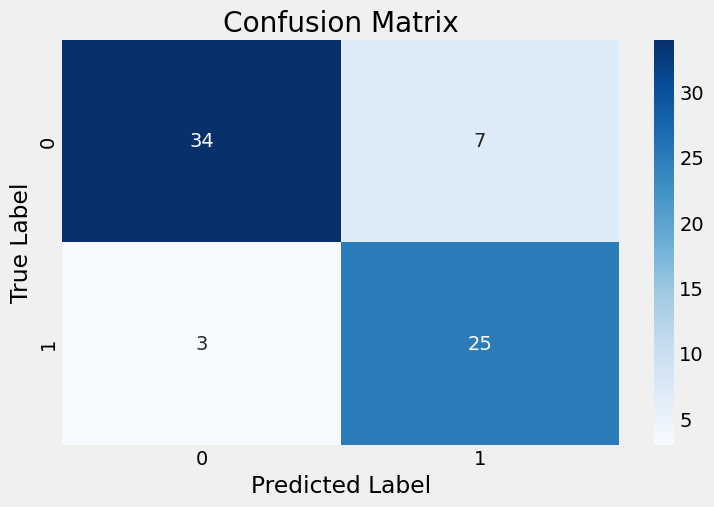

In [ ]:
print(confusion_matrix(y_test, pred))

# Mendefinisikan Confusion_matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

***
**Insight**
***
Bagaimana interpretasi hasil confusion matrix model kalian?\

Jawab: Karena data dependen (y) yang digunakan adalah variabel sex yang jika dilihat termasuk pada kategori data balance (seimbang), maka kita lebih mementingkan **akurasi** dari model yang telah dibuat dalam hal ini decision tree.

Jika digunakan perhitungan akurasi secara manual menggunakan data confusion matrix, maka: (TP+TN)/(TP+TN+FP+FN) = (35+24)/(35+6+4+24) = 86%.

hasil tersebut sama dengan hasil akurasi pada classification report yang terglong baik.

##**ROC Curve**

Tampilkan hasil evaluasi model yang telah dibangun menggunakan ROC curve!

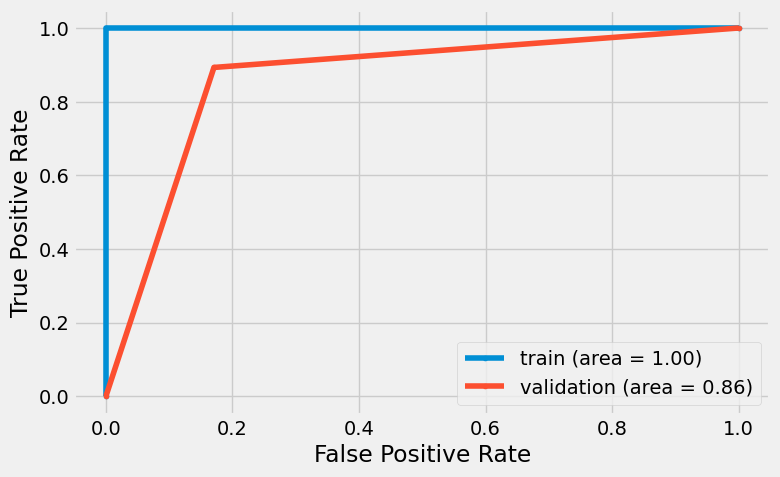

In [ ]:
from sklearn.metrics import roc_curve, auc

train_probs = model.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = model.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

roc_auc1 = auc(fpr0, tpr0)
roc_auc2 = auc(fpr1, tpr1)

plt.plot(fpr0, tpr0, marker='.', label='train (area = %0.2f)' % roc_auc1)
plt.plot(fpr1, tpr1, marker='.', label='validation (area = %0.2f)' % roc_auc2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

***
**Insight**
***
Bagaimana interpretasi hasil ROC curve model kalian?\


Jawab: Jika dilihat dari sisi kasusnya ROC tidak perlu dipertimbangkan karena pada kasus ini variabel dependen(y)-nya adalah sex dimana antara MALE(0) dan FEMAL(1) adalah balance(seimbang), yaitu sebanyak 176 dan 165. Sehingga evaluasi model yang dibangun dengan menggunakan ROC kurang tepat. Namun, jika hal tersebut diabaikan dan tetap mengguunakan ROC sebagai evaluasi model maka ROC curve untuk data training ini memiliki Area Under Curve (AUC) sebear 1,00, artinya model dapat melatih data dengan sangat baik hingga 100%. sedangkan ROC curve untuk data validation ini memiliki Area Under Curve (AUC) sebesar 0,86 yang tergolong baik, dimana validation ini bertujua untuk melihat apakah model yang diperoleh setelah training sudah memiliki kinerja hasil prediksi yang bagus atau belum. dalam hal ini, model yang digunakan yaitu decision tree baik untuk pemodelan pada kasus klasifikasi pinguin berdasarkan sex ini.\
\
Berikut adalah Parameter nilai AUC pada ROC

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#**Module 5: Actionable Insight and Data Storytelling**

Tampilkan pie chart yang menunjukkan persentase tiap spesies pinguin! (gunakan matplotlib)

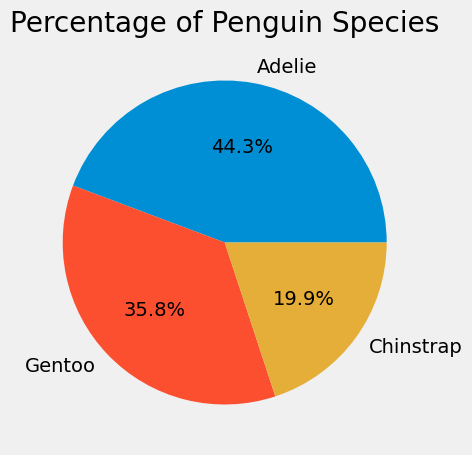

In [ ]:
# Menghitung presentase setiap spesies
species_count = data['species'].value_counts()
percentage_of_species = species_count / species_count.sum() * 100

# membuat pie chart
plt.pie(percentage_of_species, labels=percentage_of_species.index, autopct='%1.1f%%')
plt.title('Percentage of Penguin Species')
plt.show()

***
**Insight**
***
Berapa persen jumlah spesies Gentoo dari keseluruhan pinguin dalam dataset?\
Jawab: Pie chart diatas memberikan insight mengenai presentase jumlah penguins yang terdapat pada setiap spesies, dari pie chart diatas didapatkan jumlah penguins dengan spesies **Gento** memiliki presetanse 35.8% dari total keseluruhan jumlah penguins.

Tampilkan distribusi data culmen depth dari tiap spesies pinguin menggunakan boxplot! (gunakan seaborn)



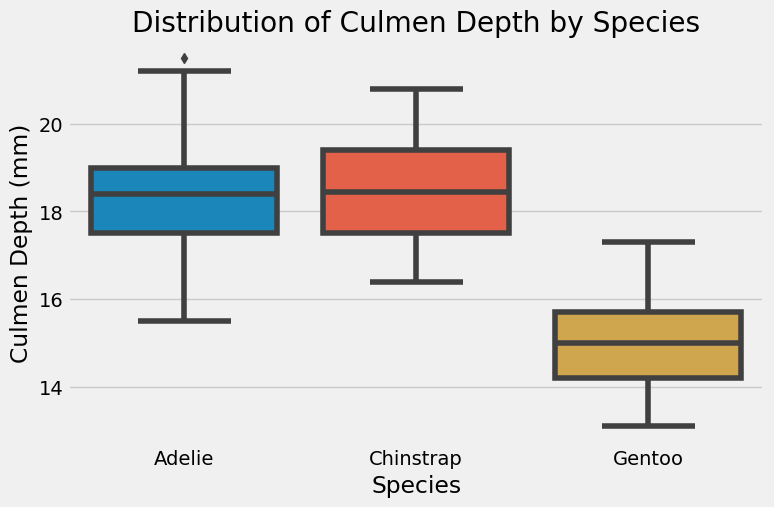

In [ ]:
# Membuat boxplot
sns.boxplot(x='species', y='culmen_depth_mm', data=data)
plt.title('Distribution of Culmen Depth by Species')
plt.xlabel('Species')
plt.ylabel('Culmen Depth (mm)')
plt.show()

***
**Insight**
***
Bagaimana distribusi data culmen depth dari tiap spesies pinguin?\
Jawab: Pada spesies pinguin Adelie dan Gentoo memiliki distribusi culmen depth yang hampir sama, tetapi untuk spesies Adelie memiliki ukuran culmen depthh yang lebih besar dibandingkan dengan Gentoo. Distribusi terbesar pada pinguin ini terletak pada jenis Chinstrap. TErlihat pada besar luasan boxplot pada gambar di atas.

Tampilkan bar chart yang menunjukkan jumlah pinguin pada tiap pulau! (gunakan seaborn)

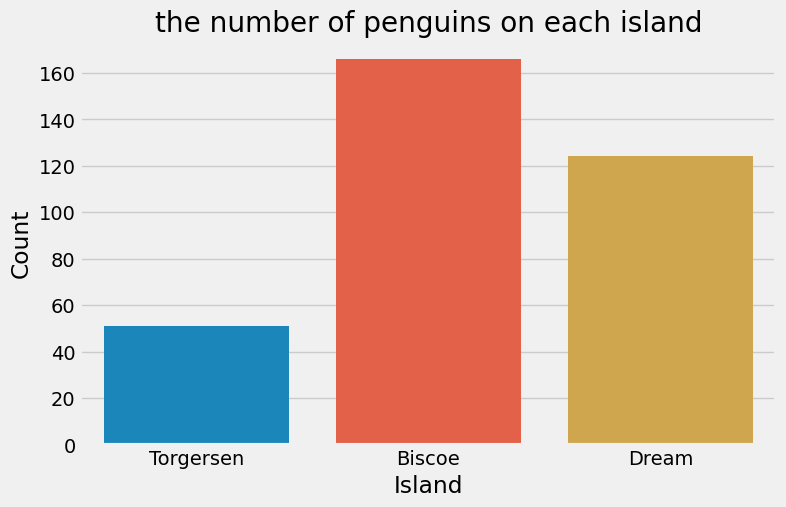

In [ ]:
# Membuat bar chart
sns.countplot(x='island', data=data)
plt.title('the number of penguins on each island')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()

***
**Insight**
***
Pulau apa yang memiliki jumlah pinguin terbanyak?\
Jawab: Dari hasil visualisasi di atas jumlah pinguin terbanyak terdapat pada pulau **Biscoe** dengan jumlah dibandingkan pada pulau Dream dan Torgersen.

Tampilkan bar chart rata - rata body mass dari tiap spesies pinguin, pisahkan berdasarkan jenis kelaminnya! (gunakan seaborn)

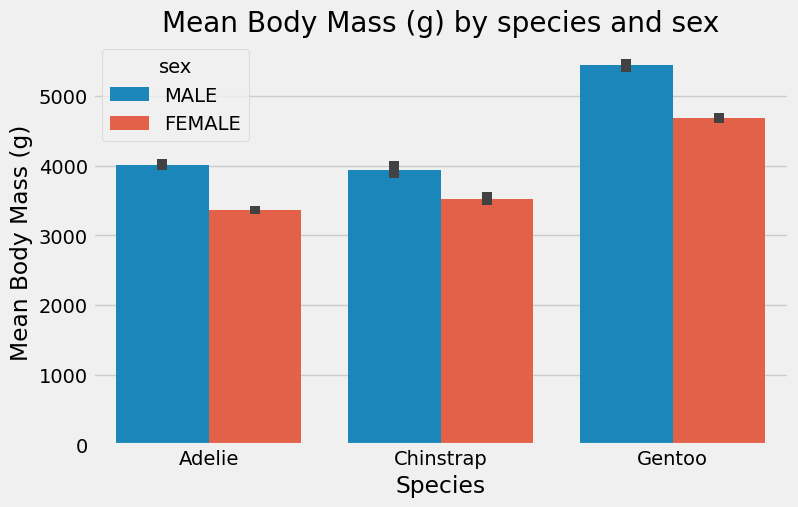

In [ ]:
# Membuat bar chart
sns.barplot(x='species', y='body_mass_g', hue='sex', data=data)
plt.title('Mean Body Mass (g) by species and sex')
plt.xlabel('Species')
plt.ylabel('Mean Body Mass (g)')
plt.show()

***
**Insight**
***
Spesies apa yang memiliki rata - rata body mass pinguin jantan terbesar?\
Jawab: Dari hasil visualisasi di atas spesies piguin dengan jumlah rata-rata bodu mass janta terbeasr adalah **Gentoo**.